In [1]:
import numpy as np
# import seaborn as sns
# import random
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
from importlib import reload
import pickle

In [3]:
with open("bsDoctor-report/data.pickle", 'rb') as fd:
    data = pickle.load(fd)

In [4]:
import bsDoctor
reload(bsDoctor)
import src.utils
reload(src.utils)

<module 'src.utils' from '/root/bsDoctor/src/utils.py'>

In [5]:
from jinja2 import Environment,FileSystemLoader

In [63]:
env = Environment(loader=FileSystemLoader('report/'))
env.globals["include_file"] = src.utils.include_file
# template = env.get_template('base.html')   
template = env.get_template('main.jinja-html')
temp_out = template.render(alldata=data)   

with open('bsDoctor-report/sample-1.html', 'w', encoding='utf-8') as f:
    f.writelines(temp_out)

In [6]:
args = '-b data/ENCFF873NOV.bam -f genome/hg38.fa -g genome/gencode.v46.annotation.gtf.gz --chr chr22 --mt chrM --control chrL --diag-pangene no --diag-quality no --diag-motif no --diag-saturation no --diag-mt no --diag-control no'.split(' ')

In [7]:
desc = "bsDoctor: Quality Diagnosis for Bisulfite-Seq Data"
parser = bsDoctor.MyArgumentParser(description=desc)
options = parser.parse_args(args)

In [8]:
options

Namespace(bamfile='data/ENCFF873NOV.bam', fafile='genome/hg38.fa', gtffile='genome/gencode.v46.annotation.gtf.gz', testchrs='chr22', chr_MT='chrM', chr_plastid='-', chr_lambda='chrL', include_quality=False, include_pangene=False, include_motif=False, include_saturation=False, include_mt=False, include_plastid=True, include_lambda=False, nuclear_sampling_step=1000, nuclear_sampling_spacing=10000, binSize=100000, bins_lambda=1000, bins_MT=1000, bins_plastid=1000, quality_threshold=0, read_quality=0, MAXDEPTH=200, reads_to_sample=10000, PANGENE_SAMPLED=1000, MAX_DP_BY_FIG=20, MAX_DP_CG_MOTIF=50, coordinate_base=1, swap_strand=False, report_dir='bsDoctor-report', save_svg=True)

In [9]:
bsDoctor.config_params(options) 

In [10]:
bsDoctor.config_params_further()

In [11]:
params = bsDoctor.params

In [29]:
import src.summary
reload(src.summary)

<module 'src.summary' from '/root/bsDoctor/src/summary.py'>

In [30]:
src.summary.compt_plot_DNA_content()

{'nuclear': 903293021, 'mt': 5098632, 'lambda': 1937622, 'plastid': 0}


In [35]:
bam = params['bam']
fa = params['fa']

['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX', 'chrY', 'chrM', 'chrL'] [66854410, 106747514, 61635942, 60943343, 52003515, 65196008, 43297414, 39560461, 32494057, 37695541, 34554069, 35915152, 30251220, 37098388, 20832687, 32931154, 23545670, 21700842, 10619470, 29545447, 12975906, 7782604, 21572724, 6667893, 5098632, 1937622] [248956422, 242193529, 198295559, 190214555, 181538259, 170805979, 159345973, 145138636, 138394717, 133797422, 135086622, 133275309, 114364328, 107043718, 101991189, 90338345, 83257441, 80373285, 58617616, 64444167, 46709983, 50818468, 156040895, 57227415, 16569, 48502]


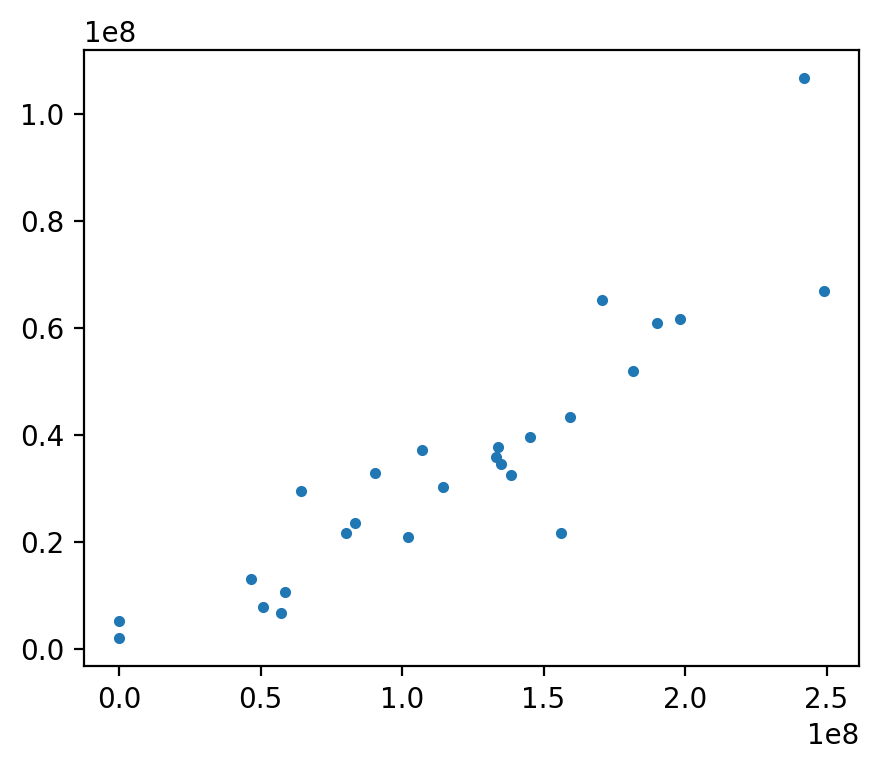

In [60]:

chrs_fa = fa.references
reference_length = params['reference_length']

nreads = []
lens = []
chrs = []
for c in bam.get_index_statistics():
    cont = c.contig
    if src.utils.contig_should_be_included(cont) and cont in chrs_fa:
    # if cont in chrs_fa:
        chrs.append(cont)
        nreads.append(c.mapped)
        lens.append(reference_length(cont))
dict_reads = {'chrs': chrs, 'lens': lens, 'nreads': nreads}

print(chrs, nreads, lens)
fig, ax = plt.subplots(figsize=(5, 4))
# plt.plot(np.log10(lens), np.log10(nreads), '.')
plt.plot(lens, nreads, '.')